In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
from langgraph.graph import StateGraph, START, END

In [ ]:
from typing import TypedDict

class State(TypedDict):
  graph_state: str

In [ ]:
def node1(state):
  print("------Node 1------")
  return {
      "graph_state": state["graph_state"] +"I am"
  }

def node2(state):
  print("------Node 2------")
  return {
      "graph_state": state["graph_state"] +" happy!"
  }

def node3(state):
  print("------Node 3------")
  return {
      "graph_state": state["graph_state"] +" sad!"
  }

In [ ]:
builder = StateGraph(State)

In [ ]:
import random
from typing import Literal

builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)

def condition(state) -> Literal["node2", "node3"]:
  if random.random() < 0.5:
    return "node2"

  return "node3"

builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", condition)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

ValueError: Node `node1` already present.

In [ ]:
graph = builder.compile()

In [ ]:
output = graph.invoke({"graph_state": "Hi My name is Pulkit. "})

print(output)

------Node 1------
------Node 2------
{'graph_state': 'Hi My name is Pulkit. I am happy!'}


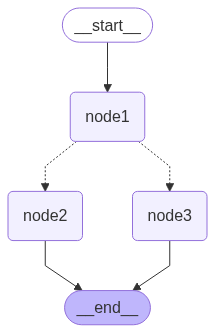

In [ ]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))